## Задание

Обозначения:

p - глубина истории, сколько измерений назад учитываем в моделях

h - горизонт прогноза , на сколько измерений вперед смотрим при моделировании (как далеко предсказываем)

1. Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с горизонт прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" . Учитывать только глубину истории при p=3

In [1]:
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

#import pandas_profiling

#from sklearn.metrics import mean_squared_error

#import statsmodels.formula.api as smf
#import statsmodels.tsa.api as smt
import statsmodels.api as sm
#import scipy.stats as scs

from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

Загрузим файл с данными и посмотрим на таблицу их организующую.

In [2]:
#Path_Energy = '"D:\AI\Machine learning\my_PJME_MW.csv"
Path_Energy = 'D:/AI/Machine learning/my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head(3)

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0


C:\Python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


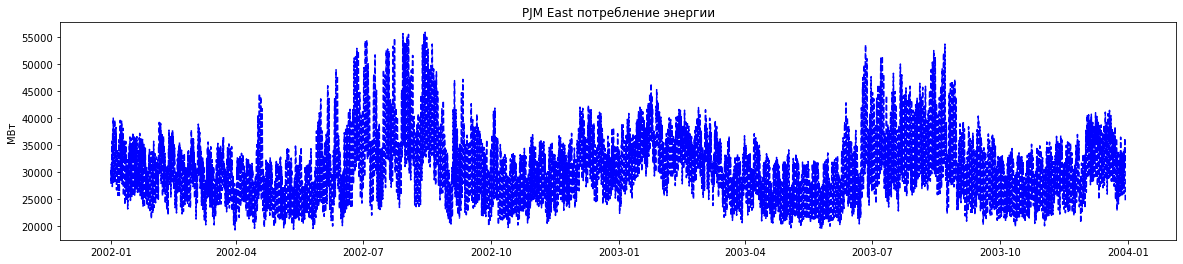

In [3]:
date_time =data['PJME_MW']
date_time.index = pd.date_range(data.index[0], periods=data.index.shape[0], freq="H")
plt.figure(figsize =(20,4))
plt.plot( date_time.index[:24*7*104], date_time.values[:24*7*104], '--b' )

plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [4]:
data_m = data.resample('M').mean()

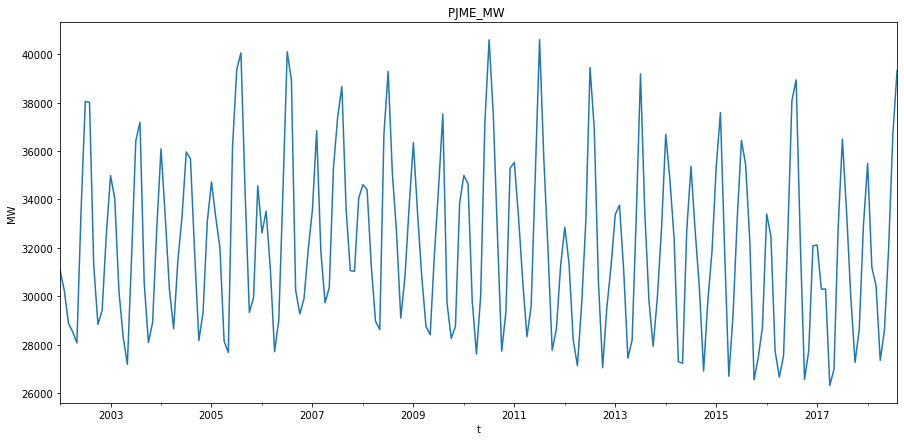

In [5]:
_ = data_m['PJME_MW'].plot( style='-', figsize=( 15, 7 ), title='PJME_MW ')
plt.ylabel('MW')
plt.xlabel('t')
plt.show()

Новые графики потеряли выбросы, но заметен различный характер рядов: сложное изменение для нефти и цикличность потребления энергии. Вывод ряд по потреблению энергии похож на стационарный, а нефть очень похожа на нестационарный. 

Посмотрим на годовые графики для потребления энергии и цен на нефть.

In [6]:
data_y = data.resample('Y').mean()

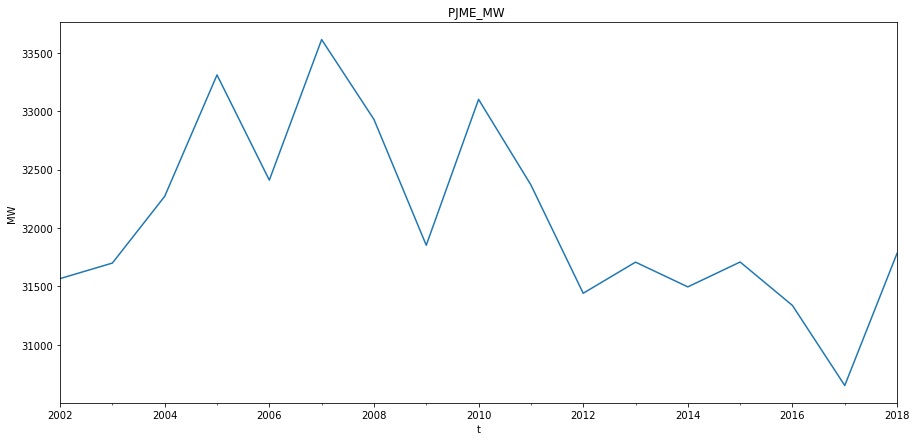

In [7]:
_ = data_y['PJME_MW'].plot( style='-', figsize=( 15, 7 ), title='PJME_MW ')
plt.ylabel('MW')
plt.xlabel('t')
plt.show()

In [8]:
diff_data = data[['PJME_MW']].diff()

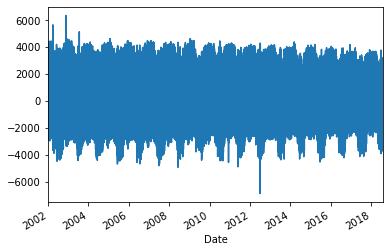

In [9]:
diff_data['PJME_MW'].plot()

In [10]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1]) #with depth 1
    return result


In [11]:
d_data=data.resample('D').mean()

Text(0.5, 1.0, 'PJME_MW')

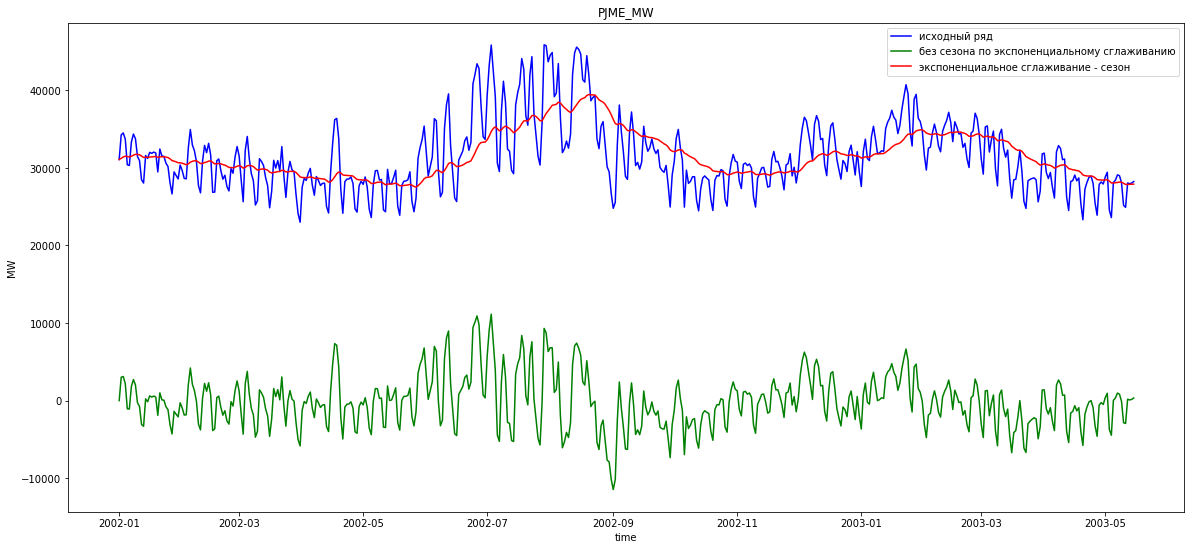

In [12]:
data_exp_1 = exponential_smoothing(d_data['PJME_MW']  , 0.05)
plt.figure(figsize=(20, 9))
plt.plot(d_data.index[:500], d_data['PJME_MW'].values[:500], 'b',label='исходный ряд')

plt.plot(d_data.index[:500],d_data['PJME_MW'].values[:500] - data_exp_1[:500] , color = 'green', 
         label="без сезона по экспоненциальному сглаживанию");

plt.plot(d_data.index[:500],data_exp_1[:500] , color = 'red', label="экспоненциальное сглаживание - сезон");

plt.xlabel('time')
plt.ylabel('MW')
plt.legend()
plt.title('PJME_MW')

In [13]:
df = pd.DataFrame(data_exp_1, index=d_data.index)
df.head(3)

,0
Date,
2002-01-01,31080.739130
2002-01-02,31239.779257
2002-01-03,31403.384044


In [14]:
#p=3
df['t'] = 0
df.iloc[1:,1]=df.iloc[:-1,0].values
df['t1']=0
df.iloc[2:,2]=df.iloc[:-2,0].values
df['t2']=0
df.iloc[3:,3]=df.iloc[:-3,0].values

df.fillna(0)


,0,t,t1,t2
Date,,,,
2002-01-01,31080.739130,0.000000,0.000000,0.000000
2002-01-02,31239.779257,31080.739130,0.000000,0.000000
2002-01-03,31403.384044,31239.779257,31080.739130,0.000000
2002-01-04,31518.987759,31403.384044,31239.779257,31080.739130
2002-01-05,31463.294621,31518.987759,31403.384044,31239.779257
...,...,...,...,...
2018-07-30,35241.910443,35362.146957,35530.527499,35584.989473
2018-07-31,35206.769087,35241.910443,35362.146957,35530.527499
2018-08-01,35407.970216,35206.769087,35241.910443,35362.146957


In [15]:
df.head()

,0,t,t1,t2
Date,,,,
2002-01-01,31080.739130,0.000000,0.000000,0.000000
2002-01-02,31239.779257,31080.739130,0.000000,0.000000
2002-01-03,31403.384044,31239.779257,31080.739130,0.000000
2002-01-04,31518.987759,31403.384044,31239.779257,31080.739130
2002-01-05,31463.294621,31518.987759,31403.384044,31239.779257


In [16]:
# сделаем примеры и модель 
def split_data(data, split_date):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

In [17]:
train, test = split_data(df, '2016-06-01')

In [18]:
h = 1

In [19]:
X_train_1 = train.iloc[:-h,:]
y_train_1 = train[df.columns[0]].values[h:]
X_test_1 = test.iloc[:-h,:]
y_test_1 = test[df.columns[0]].values[h:]

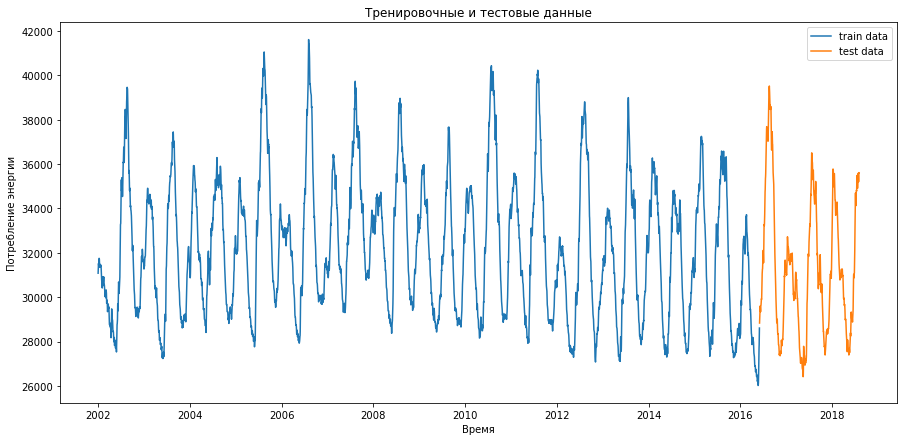

In [20]:
plt.figure(figsize=(15, 7))
plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(train.index.get_level_values('Date'), train[df.columns[0]], label='train data' )
plt.plot(test.index.get_level_values('Date'), test[df.columns[0]], label='test data')
plt.title('Тренировочные и тестовые данные')
plt.legend();

In [21]:
model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)

In [22]:
model_gb.fit(X_train_1, y_train_1) 
X_test_pred_gb = model_gb.predict(X_test_1)

**2. Оцените ошибку модели из п.1 .**

In [23]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

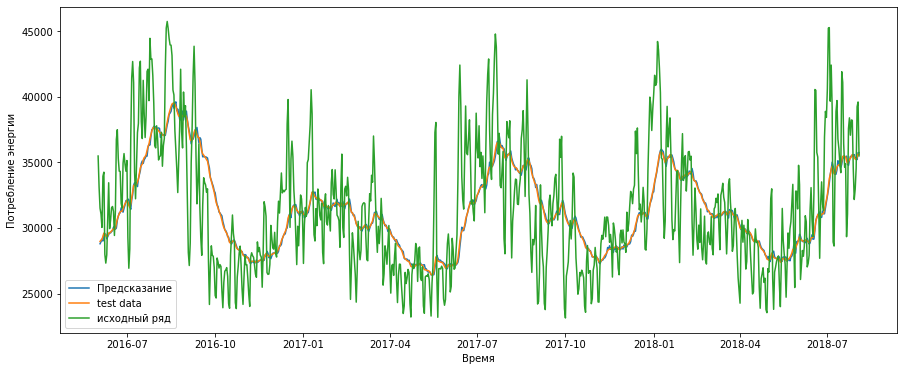

ошибка градиентного бустинга с горизонтом 1:   0.4178318054786415 %


In [24]:
plt.figure( figsize=(15, 6))

plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(test.index[h:], X_test_pred_gb, label='Предсказание')
plt.plot(test.index[h:], y_test_1, label='test data')
plt.plot(d_data.loc['2016-06-01':].index, d_data.loc['2016-06-01':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g_1 = mean_absolute_percentage_error(y_true=y_test_1, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга с горизонтом 1:  ', er_g_1, '%')

**горизонт предсказания 10 дней**

In [25]:
h = 10

In [26]:
X_train_10 = train.iloc[:-h,:]
y_train_10 = train[df.columns[0]].values[h:]
X_test_10 = test.iloc[:-h,:]
y_test_10 = test[df.columns[0]].values[h:]

In [27]:
model_gb.fit(X_train_10, y_train_10) 
X_test_pred_gb10 = model_gb.predict(X_test_10)

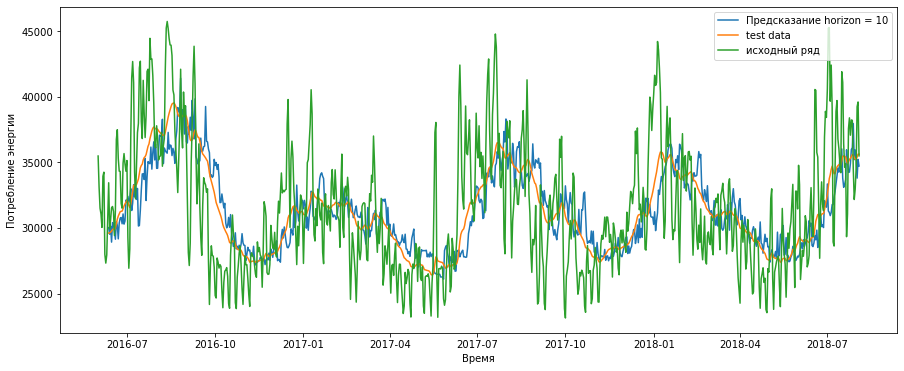

ошибка градиентного бустинга с горизонтом 10:   3.1624859751804313 %


In [28]:
plt.figure( figsize=(15, 6))

plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(test.index[h:], X_test_pred_gb10, label='Предсказание horizon = 10')
plt.plot(test.index[h:], y_test_10, label='test data')
plt.plot(d_data.loc['2016-06-01':].index, d_data.loc['2016-06-01':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g_1 = mean_absolute_percentage_error(y_true=y_test_10, y_pred=X_test_pred_gb10)

print('ошибка градиентного бустинга с горизонтом 10:  ', er_g_1, '%')

**3. Сделайте вывод о том, как изменилась ошибка модели по значениям h.**

Чем больше горизонт прогнозирования, тем большую ошибку дает модель со сглаживанием.

**4. Попробуйте предположить характер ряда** (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

    а) Изменение температуры за окном :).  
    - сезонный ряд с циклами дневными-ночными, привязанными к циклам солнечной активности, с возможным трендом на потепление (если оно и правда есть)   
    
    б) Количество денег, которые тратят покупатели в интернет магазине.  
    - циклы, привязанные к праздникам, по странам цикличность в пределах суток (в целом по миру более размазанно),тренд на повышение - все больше и больший ассортимент через интернет + выбросы, связанные с эпидемией или наоборот отключением электричества :)
    
    в) Вес растущего котенка.  
    - тренд на повышение
    г) Прирост объема деревьев в лесу от времени  
    - зависит от частоты измерений и количества лет. Если раз в день, то сезонность (весна и работа лесничества). Если десятки лет, то от пожара до пожара будут дополнительные циклы, возможно - от солнечной активности. рост более резкий график, прирост - сглаженный.
    


**5. Какие из рядов на картинке стационарны на первый взгляд? (презентация, слайд номер 21)**

Не совсем поняла про сезонность и стационарность. Нас учили сначала, что любая сезонность - уже нестационарность, так как зависимость от времени есть. Похоже , что нет ни трендов, ни сезонностей в "b", "с", "f". Но вот на счет постоянства дисперсии и матожидания - тут есть сомнения везде. Думаю, что по графику трудовых протестов "с" была бы нестационарность за период наблюдений с середины 19 века. Тогда, наверное, был бы тренд, хотя тоже не обязательно :)